In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 4 < pT < 5

Y_OS = [1396.0, 1396.0, 1357.0, 1329.0, 1346.0, 1333.0, 1260.0, 1300.0, 1307.0, 1248.0, 
        1160.0, 1241.0, 1130.0, 1170.0, 1098.0, 1126.0, 972.0, 1004.0, 1036.0, 967.0, 
        956.0, 1054.0, 919.0, 878.0, 917.0, 812.0, 845.0, 822.0, 827.0, 801.0, 751.0, 
        751.0, 774.0, 705.0, 767.0, 734.0, 778.0, 820.0, 896.0, 977.0, 1189.0, 1526.0, 
        1970.0, 2904.0, 3974.0, 4318.0, 4050.0, 3046.0, 1953.0, 1128.0, 777.0, 648.0, 
        495.0, 485.0, 467.0, 461.0, 436.0, 365.0, 381.0, 412.0, 435.0, 472.0, 422.0, 
        418.0, 374.0, 337.0, 321.0, 287.0, 301.0, 265.0, 258.0, 230.0, 251.0, 268.0, 
        220.0, 244.0, 242.0, 226.0, 227.0, 204.0, 204.0, 197.0, 203.0, 183.0, 155.0, 
        176.0, 159.0, 159.0, 152.0, 178.0, 148.0, 152.0, 156.0, 161.0, 127.0, 142.0, 
        132.0, 124.0, 116.0, 127.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [299.0, 266.0, 292.0, 330.0, 289.0, 304.0, 335.0, 297.0, 271.0, 266.0, 283.0, 273.0, 257.0, 
        254.0, 291.0, 255.0, 273.0, 270.0, 269.0, 262.0, 274.0, 277.0, 231.0, 254.0, 251.0, 241.0, 
        220.0, 232.0, 266.0, 219.0, 255.0, 242.0, 227.0, 203.0, 217.0, 223.0, 200.0, 231.0, 210.0, 
        217.0, 217.0, 214.0, 200.0, 209.0, 229.0, 220.0, 204.0, 211.0, 214.0, 194.0, 217.0, 234.0, 
        223.0, 227.0, 224.0, 192.0, 199.0, 214.0, 193.0, 197.0, 189.0, 184.0, 165.0, 182.0, 173.0, 
        135.0, 171.0, 176.0, 160.0, 146.0, 137.0, 135.0, 124.0, 139.0, 133.0, 127.0, 120.0, 101.0, 
        93.0, 91.0, 109.0, 90.0, 112.0, 93.0, 105.0, 101.0, 95.0, 112.0, 89.0, 84.0, 77.0, 74.0, 71.0, 
        86.0, 56.0, 64.0, 83.0, 63.0, 71.0, 69.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [11.0, 6.0, 10.0, 7.0, 10.0, 9.0, 12.0, 16.0, 27.0, 12.0, 30.0, 16.0, 23.0, 27.0, 35.0, 
          32.0, 35.0, 38.0, 39.0, 44.0, 45.0, 54.0, 65.0, 69.0, 57.0, 93.0, 92.0, 125.0, 129.0, 
          147.0, 164.0, 197.0, 255.0, 275.0, 344.0, 398.0, 519.0, 651.0, 874.0, 1183.0, 1679.0, 
          2534.0, 3874.0, 6473.0, 9906.0, 12451.0, 12124.0, 8098.0, 3727.0, 1479.0, 563.0, 272.0, 
          150.0, 92.0, 53.0, 33.0, 31.0, 24.0, 19.0, 17.0, 12.0, 12.0, 7.0, 6.0, 11.0, 6.0, 4.0, 
          6.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 3.0, 0.0, 0.0, 3.0, 
          0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 0.0, 3.0, 5.0, 5.0, 3.0, 3.0, 5.0, 6.0, 3.0, 6.0, 
         5.0, 6.0, 9.0, 12.0, 9.0, 13.0, 12.0, 17.0, 10.0, 13.0, 15.0, 17.0, 22.0, 13.0, 23.0, 22.0, 
         20.0, 35.0, 33.0, 31.0, 28.0, 40.0, 34.0, 47.0, 54.0, 55.0, 51.0, 58.0, 81.0, 98.0, 98.0, 
         139.0, 154.0, 198.0, 267.0, 320.0, 383.0, 494.0, 645.0, 948.0, 1381.0, 2099.0, 3310.0, 4910.0, 
         5841.0, 5531.0, 3590.0, 1767.0, 756.0, 319.0, 137.0, 63.0, 51.0, 29.0, 22.0, 10.0, 7.0, 9.0, 
         7.0, 5.0, 7.0, 4.0, 6.0, 1.0, 0.0, 3.0, 4.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 3.0, 1.0, 0.0, 1.0, 
         1.0, 2.0, 0.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [13.0, 7.0, 12.0, 9.0, 11.0, 10.0, 13.0, 19.0, 27.0, 15.0, 35.0, 21.0, 26.0, 30.0, 40.0, 38.0, 
        38.0, 44.0, 44.0, 50.0, 54.0, 66.0, 74.0, 82.0, 69.0, 110.0, 102.0, 138.0, 144.0, 164.0, 186.0, 
        210.0, 278.0, 297.0, 364.0, 433.0, 552.0, 682.0, 902.0, 1223.0, 1713.0, 2581.0, 3928.0, 6528.0, 
        9957.0, 12509.0, 12205.0, 8196.0, 3825.0, 1618.0, 717.0, 470.0, 417.0, 412.0, 436.0, 527.0, 676.0, 
        972.0, 1400.0, 2116.0, 3322.0, 4922.0, 5848.0, 5537.0, 3601.0, 1773.0, 760.0, 325.0, 138.0, 65.0, 
        54.0, 30.0, 24.0, 12.0, 9.0, 11.0, 7.0, 7.0, 9.0, 6.0, 6.0, 4.0, 0.0, 3.0, 7.0, 1.0, 3.0, 2.0, 2.0, 
        0.0, 3.0, 3.0, 2.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 104338.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, p1L1, p2L1, p3L1, alphaR1, p1R1, p2R1, p3R1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, p1L2, p2L2, p3L2, alphaR2, p1R2, p2R2, p3R2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = NA60
func_Psi = NA60
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

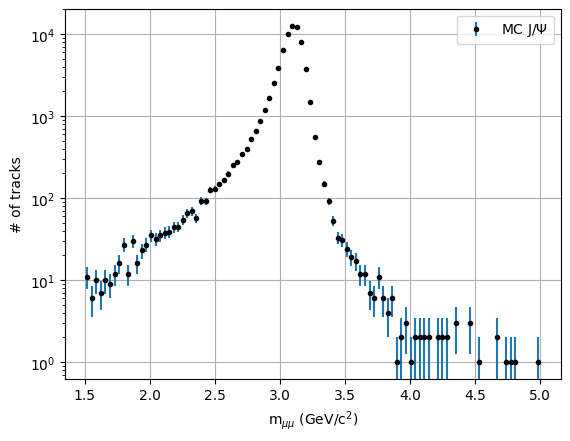

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([np.max(y_data), 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 1, 1, 1, 2.233482641523906, 1, 1, 1])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [12977.436373241315, 3.104893290658011, 0.05890726758880856, -0.3364621531119695, 0.15846177697000802, 1.3043328430258214, 0.03923298227655404, 1.8537260633208672, 0.12849516026697422, 1.2764366430427476, 0.02807993559541868]
pcov: 
 [[ 6.67760416e+03  2.99202561e-03 -2.15600071e-02 -2.01517077e+00
   3.09287658e-01 -1.08400371e+00 -1.08757505e-01 -1.35588422e+00
  -6.97146323e-02  2.28970680e-01  1.33811124e-02]
 [ 2.99202561e-03  1.01331702e-06 -7.49612855e-07  1.82718056e-04
  -1.45510689e-05  4.43333699e-05  3.30761865e-06 -3.08389676e-05
  -4.49098466e-07  4.17720734e-07 -2.27085785e-07]
 [-2.15600071e-02 -7.49612855e-07  7.30302189e-07 -1.39668359e-04
   1.03417678e-05 -3.09096689e-05 -2.17461628e-06  4.19181010e-05
   1.55486930e-06 -5.05708450e-06 -2.28512771e-07]
 [-2.01517077e+00  1.82718056e-04 -1.39668359e-04  4.44247183e-02
  -4.08787097e-03  1.31226704e-02  1.08976527e-03 -6.61304061e-03
  -1.56758806e-04  3.95034711e-04 -1.09118521e-05]
 [ 3.09287658e-01 -1.45510

fit error : 81.71701468561665


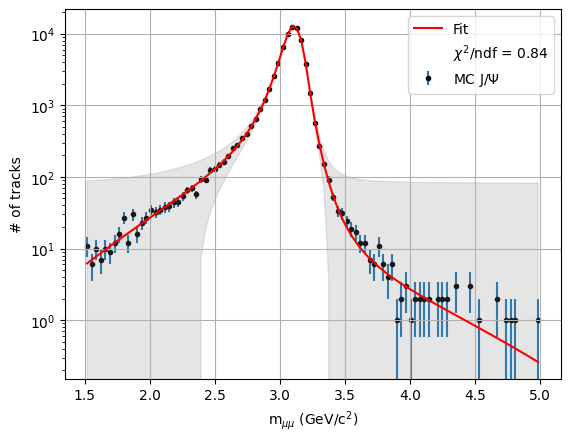

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

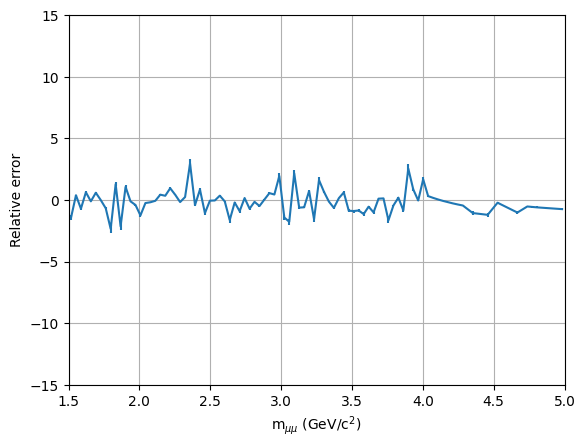

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

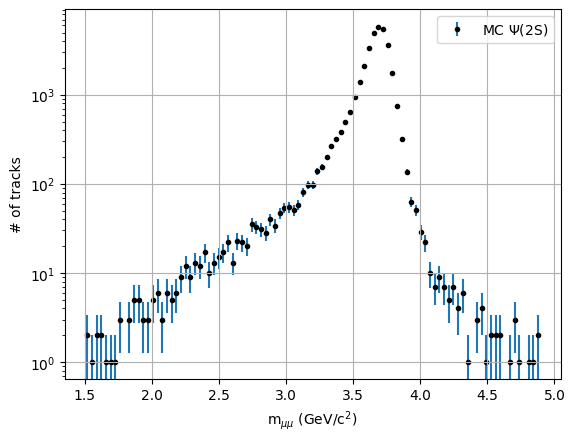

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([np.max(y_data), 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 1, 1, 1, 2.283717751711943, 1, 1, 1])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [6004.2986463802645, 3.6935778856445167, 0.06341949939403736, -0.7380656613293051, 0.2107753802222216, 1.152254670895813, 0.02432654336729248, 1.612378142545055, 0.09133240490246781, 1.4773126682123399, 0.0481018145253431]
pcov: 
 [[ 2.39219514e+03  9.88333518e-03 -2.46237072e-02  3.46297053e-01
   5.50384857e-02 -1.61895406e-01 -2.11033363e-02 -2.11763261e+00
  -1.02108036e-01  5.05246771e-01  3.47269057e-02]
 [ 9.88333518e-03  6.89065596e-07 -5.07993257e-07  6.58294910e-05
  -5.02468424e-06  1.09285330e-05  6.86315936e-07 -2.07746144e-05
  -1.65936897e-07 -1.53381724e-06 -5.52452090e-07]
 [-2.46237072e-02 -5.07993257e-07  7.29021345e-07 -5.81574952e-05
   3.30550515e-06 -6.79437773e-06 -2.96875296e-07  7.07730853e-05
   3.52868733e-06 -1.87179325e-05 -1.47775828e-06]
 [ 3.46297053e-01  6.58294910e-05 -5.81574952e-05  1.37424264e-02
  -1.63403960e-03  4.02211899e-03  3.36407006e-04 -4.17061309e-03
  -1.59292157e-04  7.30325999e-04  3.61525809e-05]
 [ 5.50384857e-02 -5.02468424

fit error : 48.911001066781665


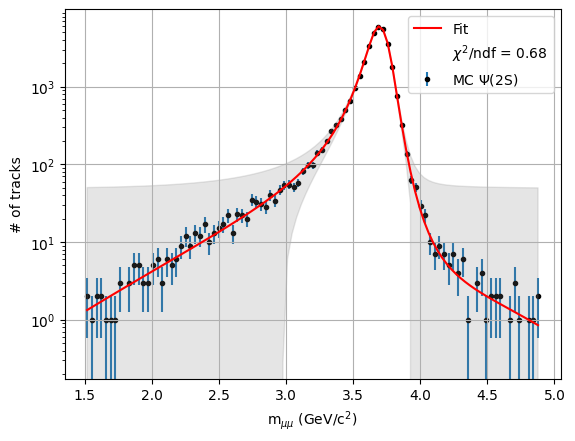

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

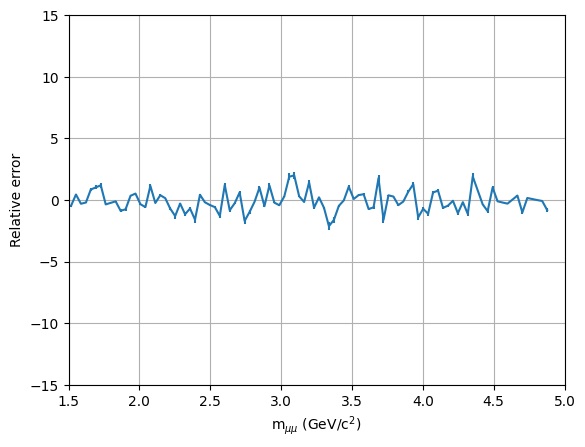

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

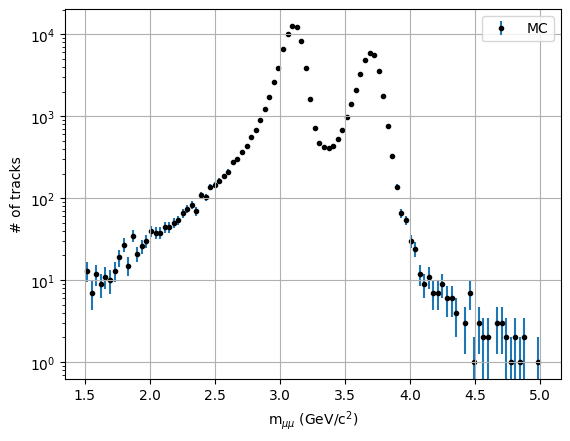

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [12954.72362679472, 3.104887344644894, 0.05902885751127526, 6006.980615087371, 3.6935276176541953, 0.06345605659351039]
pcov: 
 [[ 4.84493239e+03  3.34527863e-03 -1.21856247e-02 -3.10568145e+01
  -5.15464167e-04  7.50471439e-04]
 [ 3.34527863e-03  9.33609205e-08 -1.48242885e-08  8.65880732e-06
   1.29194603e-09 -1.16685897e-09]
 [-1.21856247e-02 -1.48242885e-08  5.83171176e-08  3.51676088e-04
   5.83046334e-09 -9.05317835e-09]
 [-3.10568145e+01  8.65880732e-06  3.51676088e-04  2.12918977e+03
   4.51127964e-03 -1.26387808e-02]
 [-5.15464167e-04  1.29194603e-09  5.83046334e-09  4.51127964e-03
   2.16628527e-07 -5.45685755e-08]
 [ 7.50471439e-04 -1.16685897e-09 -9.05317835e-09 -1.26387808e-02
  -5.45685755e-08  1.45157424e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.49657214,  0.55242212, -0.74818124,  0.48421294,  0.18220789,
        0.90874625,  0.35288606, -0.73114995, -1.82639305,  1.13051725,
       -2.29262191,  0.59008628,  0.03983293, -0.19007367, -1.2648483 ,
       -0

fit error : 83.51120978585223


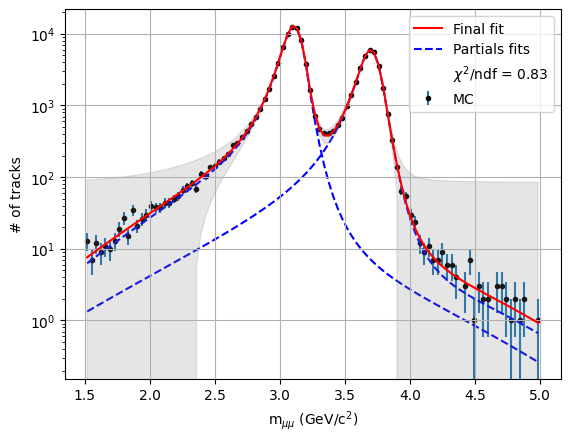

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_7568/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


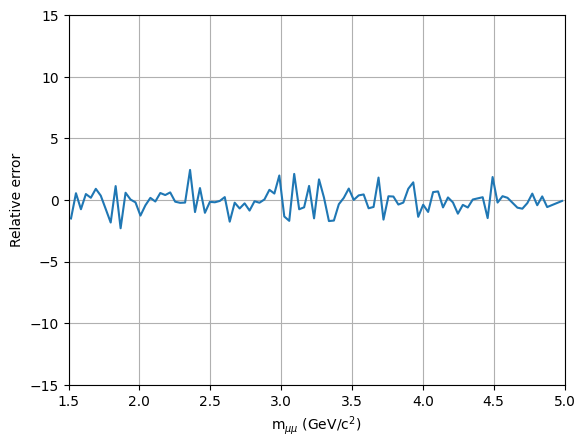

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

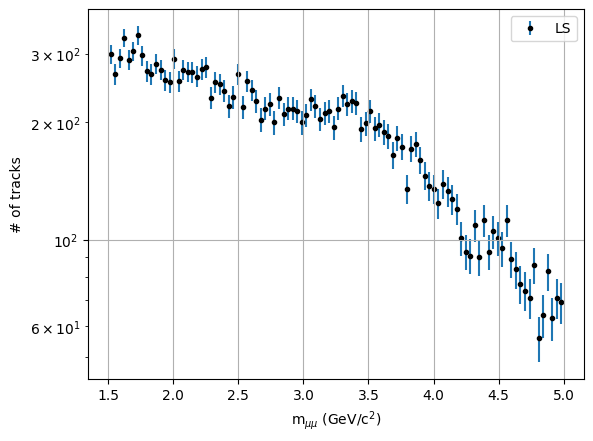

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [5.769514165877228, 5.479923889618827, 5.266718208222316, 5.073053008497281, 4.121379905167315]
pcov: 
 [[ 1.01247617e-03 -1.76084805e-04  1.43911326e-04  6.54529167e-05
   2.79928393e-04]
 [-1.76084805e-04  2.02245266e-04  4.02828540e-06 -2.19973925e-05
  -7.62293322e-06]
 [ 1.43911326e-04  4.02828540e-06  2.74773290e-04  1.94236152e-04
   8.19688197e-05]
 [ 6.54529167e-05 -2.19973925e-05  1.94236152e-04  2.78799174e-04
  -3.65538832e-04]
 [ 2.79928393e-04 -7.62293322e-06  8.19688197e-05 -3.65538832e-04
   4.56732170e-03]]
residual: 
 {'nfev': 16, 'fvec': array([ 1.05022452,  2.76239194,  0.78239717, -1.64705452,  0.36215058,
       -0.76998719, -2.66015498, -0.85043385,  0.46486848,  0.56523225,
       -0.65245521, -0.23894067,  0.57931228,  0.60952583, -1.73990387,
        0.25608642, -0.96768453, -0.90843738, -0.95952821, -0.6444198 ,
       -1.45099303, -1.71299867,  1.05822995, -0.51746338, -0.41101524,
        0.14688414,  1.49131167,  0.59073146, -1.59995298,  1.3402926

fit error : 0.07959658031730751


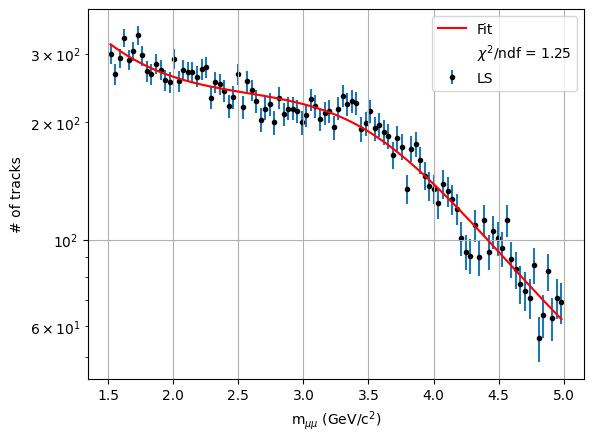

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

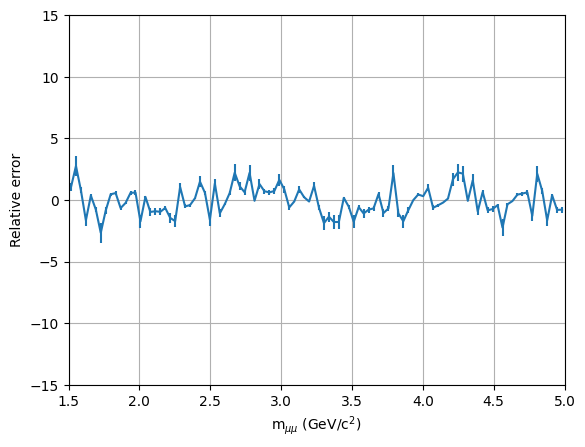

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

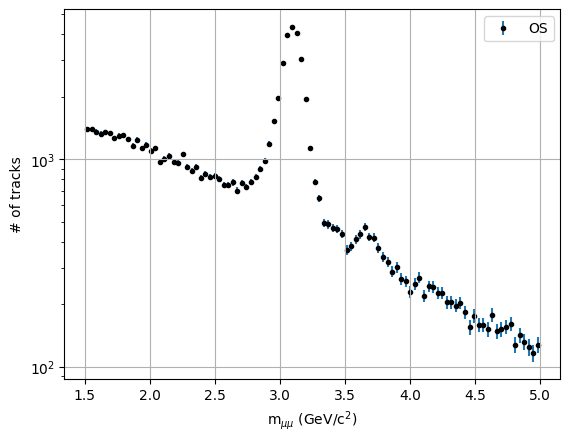

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2, y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [4023.763515117425, 3.103189634966226, 0.0647979943476894, 124.07216755369912, 3.675377655214473, 0.06976144933344079, 7.284222932130863, 6.642371939948078, 5.94669826627919, 5.697243394278377, 4.745911170176082]
pcov: 
 [[ 4.07769800e+03  8.38397484e-03 -4.17545195e-02  7.52701242e+00
  -1.60402738e-02  3.16522487e-02 -2.82505821e-02  6.56239175e-03
  -6.40419142e-02 -4.24636683e-02 -3.01895237e-02]
 [ 8.38397484e-03  1.19131222e-06 -3.07805603e-07 -4.08137076e-04
   6.21934165e-07 -1.24050009e-06 -3.79146004e-10  2.26086175e-06
   3.72365162e-06  1.90230656e-06  2.66429840e-06]
 [-4.17545195e-02 -3.07805603e-07  1.34107323e-06  3.22541676e-03
  -1.90361565e-06  4.40380794e-06 -3.42442386e-06 -6.87099132e-06
  -1.82026731e-05 -1.11370833e-05 -8.80016214e-06]
 [ 7.52701242e+00 -4.08137076e-04  3.22541676e-03  4.78538557e+02
   1.56950567e-02 -1.49750793e-01 -4.29957066e-02 -3.16528710e-02
  -1.62448875e-01 -1.32993106e-01  2.26363031e-02]
 [-1.60402738e-02  6.21934165e-07 -1.90

fit error : 67.49995239374473


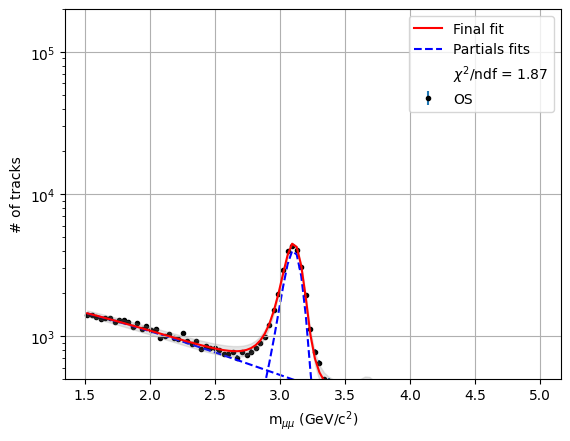

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

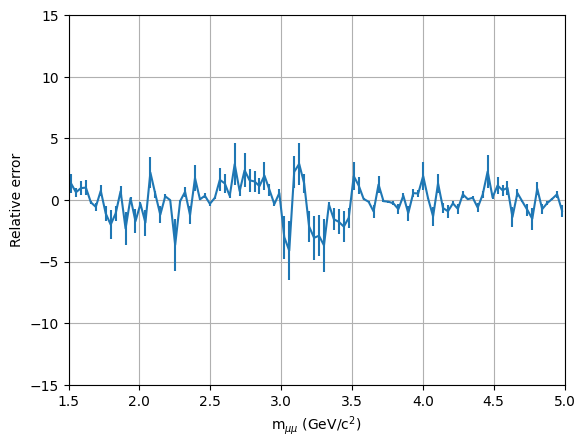

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dNA60(pcov, x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    
    def dNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) - (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(-2*mu + 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2,
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(-p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) + (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])  

    def dNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
            return np.piecewise(x, 
                                [(x - mu)/sig < alphaL, 
                                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                                 (x - mu)/sig > alphaR],
                                [lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/sig**2), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) + (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(2*mu - 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2, 
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) - (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                [(x - mu)/sig < alphaL, 
                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                 (x - mu)/sig > alphaR],
                [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*(-mu + x)*np.log(alphaL - (-mu + x)/sig)/(2*sig**2*np.sqrt(alphaL - (-mu + x)/sig)) + (-mu + x)*(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig**2*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                 lambda x: 1.0*N*(-mu + x)**2*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**3,
                 lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*(-mu + x)*np.log(-alphaR + (-mu + x)/sig)/(2*sig**2*np.sqrt(-alphaR + (-mu + x)/sig)) - (-mu + x)*(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig**2*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    
    def IdNA60dx(x, *args):
        return quad(dNA60dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dN(x, *args):
        return quad(dNA60dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dmu(x, *args):
        return quad(dNA60dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dsig(x, *args):
        return quad(dNA60dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * (((stop - start)/bins)/2)**2 \
                   + IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[0, 0] \
                   + IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[1, 1] \
                   + IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[2, 2] \
                   + 2 * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[2, 1])))


N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dNA60(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  23787.143062990854  +/-  596.5238628472235 (stat.)
